# Detecting Credit Card Fraud
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The goal of this project is to build a model able to recognize fraudulent credit card transactions. More info [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from screeplot import scree as sp
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Exploratory Data Analysis 

In [2]:
#load dataset a
transactions_a = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_a.csv")
transactions_a.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#load dataset b
transactions_b = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectCCF/data/creditcard_b.csv")
transactions_b.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,127895,0.155432,-0.513165,0.348025,-2.290819,0.412328,0.537240,0.076755,-0.072367,-0.343188,...,-0.228727,0.264679,0.154866,-1.067183,-1.192413,0.735726,-0.154075,-0.200072,30.43,0
1,127895,0.144968,0.984625,-0.469259,-0.559418,0.898427,-0.774439,0.966555,-0.079312,0.029686,...,-0.350727,-0.894781,0.103029,0.458925,-0.419840,0.120432,0.216811,0.082648,9.98,0
2,127895,-0.611349,1.283775,-1.974043,-1.655406,2.984231,3.506069,-0.214317,-0.632051,0.167111,...,1.160112,-1.450777,0.343309,0.560751,-0.335527,0.181544,0.424852,0.145803,1.98,0
3,127895,1.836002,-1.291509,-1.777315,-0.937930,-0.474535,-0.957642,0.010062,-0.324263,-0.882252,...,0.190313,-0.002319,-0.013476,-0.410082,-0.131701,-0.329364,-0.092481,-0.042942,210.00,0
4,127895,2.013508,0.171357,-2.245188,0.936324,0.243521,-1.389765,0.106378,-0.197682,1.011673,...,-0.036278,0.138471,-0.027367,-0.273424,0.133993,0.739868,-0.046538,-0.016684,12.31,0


In [4]:
#look at shape of each data set
print(transactions_a.shape)
print(transactions_b.shape)

(188261, 31)
(96546, 31)


In [5]:
#check what percentage of total each df is 
print('transactions_a percent of total:', len(transactions_a)/(len(transactions_a)+len(transactions_b)))
print('transactions_b percent of total:', len(transactions_b)/(len(transactions_a)+len(transactions_b)))

transactions_a percent of total: 0.6610125453377199
transactions_b percent of total: 0.3389874546622801


Both sets of data are made up of 31 variables with dataset a containing 188261 transactions and dataset b containing 96546 transactions. Out of the 31 variables in both datasets 28 are the result of principal component analysis dimensionality reduction. Class 0 represents non-fraudulent transactions whereas class 1 represents a fraudulent transaction.

In this analysis dataset a will be the training set and dataset b will be the test set. This is a ~60/30 split for training and test.

In [6]:
#check to see if there are any missing variaibles
transactions_a.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
transactions_b.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#look at statistics for dataset a
transactions_a.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,...,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000,188261.000000
mean,66911.456133,-0.126822,0.014291,0.382492,0.088906,-0.135514,0.051997,-0.062135,0.022762,0.012470,...,-0.018645,-0.060742,-0.018174,0.006075,0.072205,0.008475,0.001743,0.002159,89.001896,0.001955
std,32193.455193,1.880580,1.617636,1.428443,1.390410,1.356318,1.306515,1.212057,1.215524,1.141162,...,0.740574,0.683146,0.602326,0.602125,0.481530,0.489470,0.392295,0.309244,247.536020,0.044169
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43063.000000,-0.969960,-0.568821,-0.232844,-0.777499,-0.800564,-0.702594,-0.580756,-0.174494,-0.661910,...,-0.228174,-0.540949,-0.169179,-0.338314,-0.225184,-0.331172,-0.066673,-0.037727,5.950000,0.000000
50%,64747.000000,-0.121054,0.088501,0.542372,0.091115,-0.190869,-0.212486,-0.018999,0.047961,-0.075250,...,-0.047005,-0.046420,-0.031424,0.055085,0.116005,-0.060305,0.006937,0.019434,22.740000,0.000000
75%,84168.000000,1.202527,0.788329,1.252559,0.905617,0.432033,0.446707,0.485381,0.342508,0.630737,...,0.143127,0.401625,0.109336,0.419810,0.389855,0.265838,0.089279,0.078149,79.000000,0.000000
max,127894.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


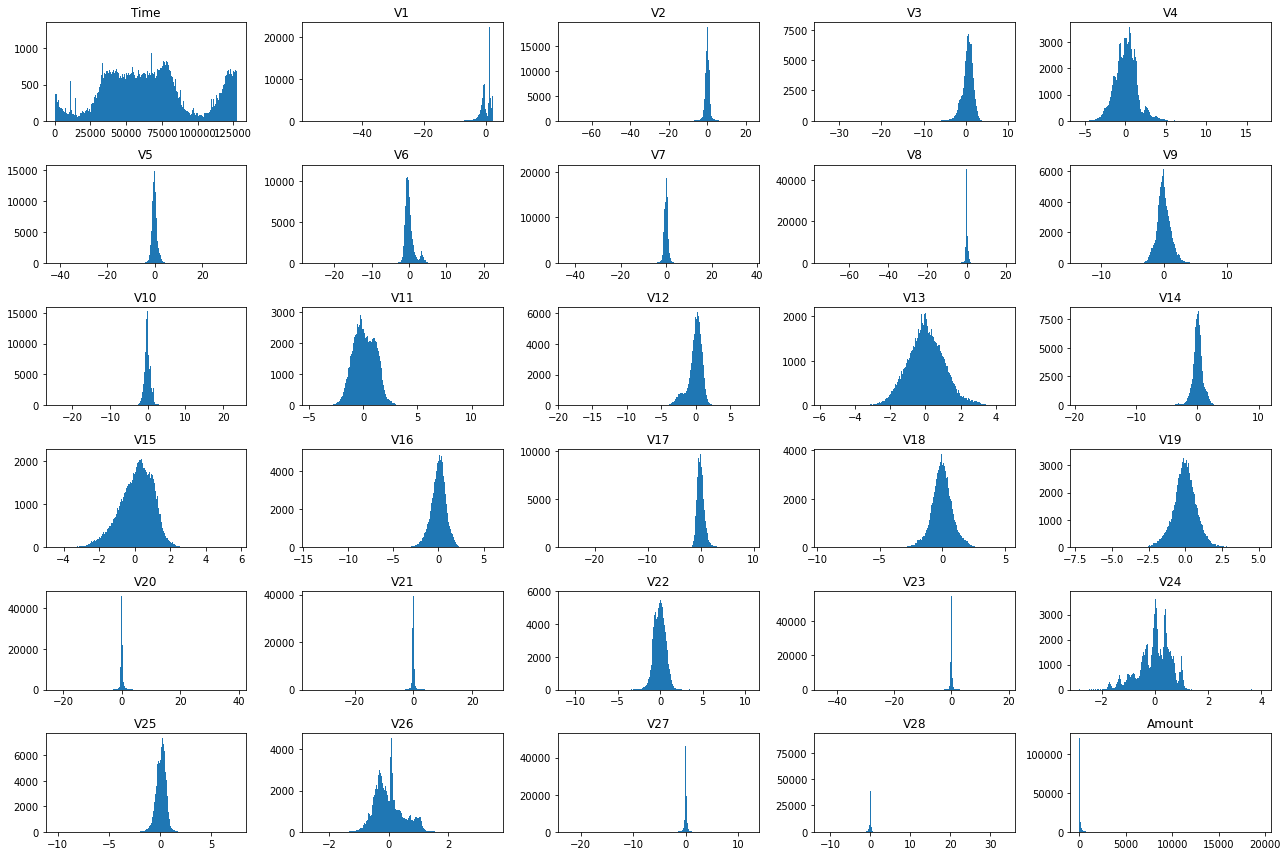

In [9]:
#plot the distributions of the variables
cols = list(transactions_a.columns[:30])

fig, axs = plt.subplots(nrows = 6, ncols=5, figsize = (18,12))
axs = axs.ravel()
for i, ax in enumerate(axs):
    ax.hist(transactions_a[cols[i]],
            bins='sqrt')
    ax.set_title(cols[i])
plt.tight_layout()


It appears that amount is highly skewed to the right. While the other variables made up of the principal components are roughly normally distributed. I am going to plot a box plot to visualize the outliers of the Amount variable

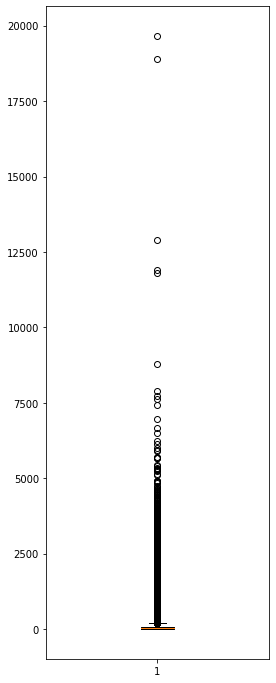

In [10]:
#boxplot of amount variable. 
fig1, axs = plt.subplots(figsize = (4,12))
axs.boxplot('Amount', data = transactions_a)
plt.show()

The boxplot shows us that there is a large spread in the amount of money spent in a transaction. Amount of money could be an indicator of fraud. This can also be supported by the descriptive statistics because the maximum spend transaction was marked as fraudulent. 

Because we are going to run a logistic regression on the dataset we will want to ensure that all of our features are scaled. We are going to transform the 'amount' column using a standard scaler. Based on the descriptive statistics the mean/standard deviation of the principal components follow a roughly normal distribution; this is the reason we will use a standard scaler. 

In [11]:
scaler = StandardScaler()

#transform training set
trans_a = transactions_a['Amount']
trans_a = np.asarray(trans_a).reshape(-1,1)
amount_a = scaler.fit_transform(trans_a)
amount_a_df = pd.DataFrame(amount_a)
transactions_a = transactions_a.join(amount_a_df,lsuffix="_left", rsuffix="_right")
print(transactions_a)

            Time        V1         V2        V3        V4        V5        V6  \
0            0.0 -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...        ...       ...       ...       ...       ...   
188256  127893.0 -8.852104 -11.509369  0.449332  2.068166  5.423514 -4.506990   
188257  127894.0  1.609287  -0.581437  0.008484  1.655629 -1.162795 -0.938786   
188258  127894.0  2.097886  -0.685229 -1.281921 -0.318993 -0.235987 -0.167462   
188259  127894.0  1.851731  -0.368532  0.157316  1.422273 -0.917616 -0.315417   
188260  127894.0  1.759307  -0.459599 -0.379355  1.665059 -0.555768 -0.275380   

              V7        V8 

In [12]:
#rename and drop original Amount column
transactions_a.rename(columns={0:'transformed_amount'}, inplace=True)
transactions_a.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,transformed_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244887
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.348685
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.170169
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139366
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.076805


In [13]:
#transform test set
trans_b = transactions_b['Amount']
trans_b = np.asarray(trans_a).reshape(-1,1)
amount_b = scaler.fit_transform(trans_b)
amount_b_df = pd.DataFrame(amount_b)
transactions_b = transactions_b.join(amount_b_df,lsuffix="_left", rsuffix="_right")
print(transactions_b)

         Time         V1         V2        V3        V4        V5        V6  \
0      127895   0.155432  -0.513165  0.348025 -2.290819  0.412328  0.537240   
1      127895   0.144968   0.984625 -0.469259 -0.559418  0.898427 -0.774439   
2      127895  -0.611349   1.283775 -1.974043 -1.655406  2.984231  3.506069   
3      127895   1.836002  -1.291509 -1.777315 -0.937930 -0.474535 -0.957642   
4      127895   2.013508   0.171357 -2.245188  0.936324  0.243521 -1.389765   
...       ...        ...        ...       ...       ...       ...       ...   
96541  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
96542  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
96543  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
96544  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
96545  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

             V7        V8        V9  ...       V22 

In [14]:
#rename and drop original Amount column
transactions_b.rename(columns={0:'transformed_amount'}, inplace=True)
transactions_b.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,transformed_amount
0,127895,0.155432,-0.513165,0.348025,-2.290819,0.412328,0.537240,0.076755,-0.072367,-0.343188,...,0.264679,0.154866,-1.067183,-1.192413,0.735726,-0.154075,-0.200072,30.43,0,0.244887
1,127895,0.144968,0.984625,-0.469259,-0.559418,0.898427,-0.774439,0.966555,-0.079312,0.029686,...,-0.894781,0.103029,0.458925,-0.419840,0.120432,0.216811,0.082648,9.98,0,-0.348685
2,127895,-0.611349,1.283775,-1.974043,-1.655406,2.984231,3.506069,-0.214317,-0.632051,0.167111,...,-1.450777,0.343309,0.560751,-0.335527,0.181544,0.424852,0.145803,1.98,0,1.170169
3,127895,1.836002,-1.291509,-1.777315,-0.937930,-0.474535,-0.957642,0.010062,-0.324263,-0.882252,...,-0.002319,-0.013476,-0.410082,-0.131701,-0.329364,-0.092481,-0.042942,210.00,0,0.139366
4,127895,2.013508,0.171357,-2.245188,0.936324,0.243521,-1.389765,0.106378,-0.197682,1.011673,...,0.138471,-0.027367,-0.273424,0.133993,0.739868,-0.046538,-0.016684,12.31,0,-0.076805


As this dataset was already transformed using PCA I want to see where most of the variablity of the dataset lies. This is done using a scree_plot as shown below. 

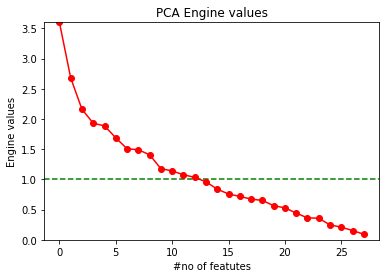

In [15]:
PC_a = transactions_a.iloc[:,1:29]
sp.scree_plot(PC_a)

Based on the scree plot explaination of variance within the principal components I am going to choose to run the models with both the first Five principal components as this is where most of the variance is explained (This is where the elbow of the plot appears to be). 

This is a quick simple article to explain how to interpret the plot and choosing the number of principal components to use. https://www.theanalysisfactor.com/factor-analysis-how-many-factors/ 

Next we are going to visualize and investigate the distribution of the classification for fraudulent versus non-fraudulent transactions. 

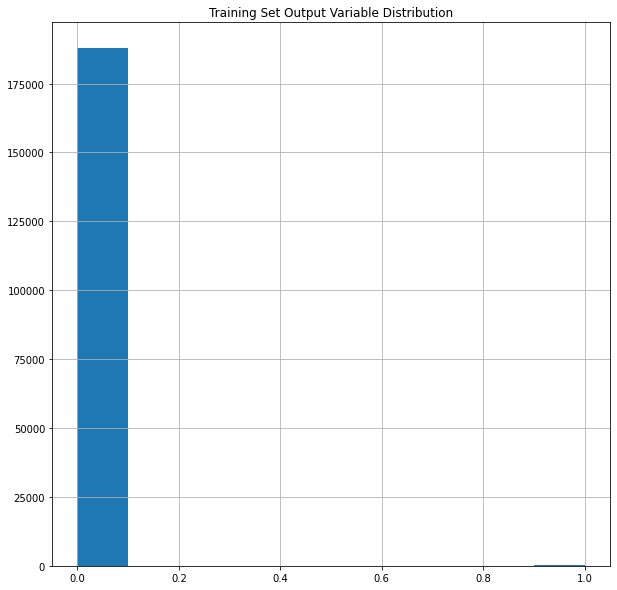

In [16]:
#distribution of frauduent/non-fraudulent transactions for dataset a
%matplotlib inline
transactions_a['Class'].hist(bins=10, figsize=(10,10))
plt.title('Training Set Output Variable Distribution')
plt.show()

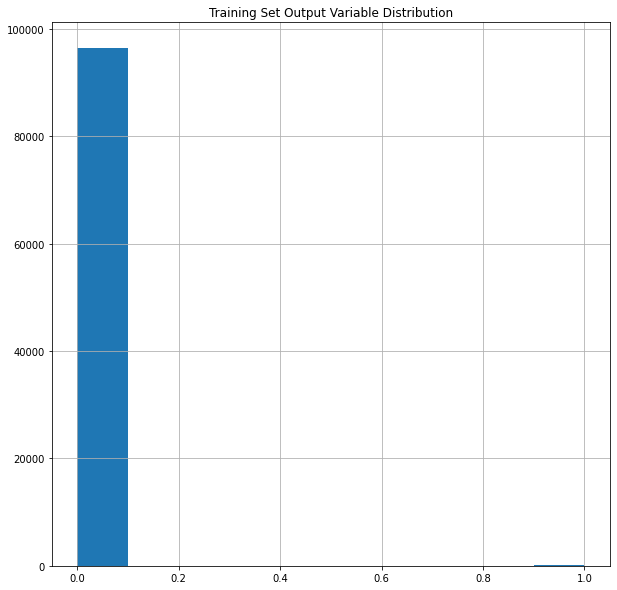

In [17]:
#distribution of fraudulent/non-fraudulent transactions for dataset b
%matplotlib inline
transactions_b['Class'].hist(bins=10, figsize=(10,10))
plt.title('Training Set Output Variable Distribution')
plt.show()

In [18]:
#count of fraudulent/non-fraudulent dataset a
count_a = transactions_a['Class'].value_counts()
print(count_a)
fraud_a = (count_a[1]/(count_a[0] + count_a[1]))*100
print(fraud_a)

0    187893
1       368
Name: Class, dtype: int64
0.19547330567669352


In [19]:
#count of fraudulent/non-fraudulent dataset b
count_b = transactions_b['Class'].value_counts()
print(count_b)
fraud_b = (count_b[1]/(count_b[0] + count_b[1]))*100
print(fraud_b)

0    96422
1      124
Name: Class, dtype: int64
0.12843618585959024


Based on the histogram distributions of the outcome varaibles for both datasets we can see that the data is very imbalanced. Less than 1% of transactions were deemed fraudulent. In this case it will be important to balance the data before feeding it to the model to ensure that the model is better able to predict cases of fraud. We can balance the data by oversampling the fraudulent cases, or undersampling the non-fraudulent cases using a resampling technique

## Model Building

In [20]:
#Principal Components to keep
keep_list = ['V1', 'V2', 'V3','V4', 'V5', 'transformed_amount', 'Class'] #this is for 5 principal components

I am not going to keep the 'Time' variable as this does not seem like it will provide useful information as it is described as being a measure of time between the current transaction and the first transaction on the dataset. 

In [21]:
#build dataframe with first 5 principal components for both the training and the test set
FivePC_a = transactions_a[keep_list].copy()
FivePC_b = transactions_b[keep_list].copy()
print(FivePC_a.head())
print(FivePC_b.head())

         V1        V2        V3        V4        V5  transformed_amount  Class
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321            0.244887      0
1  1.191857  0.266151  0.166480  0.448154  0.060018           -0.348685      0
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198            1.170169      0
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309            0.139366      0
4 -1.158233  0.877737  1.548718  0.403034 -0.407193           -0.076805      0
         V1        V2        V3        V4        V5  transformed_amount  Class
0  0.155432 -0.513165  0.348025 -2.290819  0.412328            0.244887      0
1  0.144968  0.984625 -0.469259 -0.559418  0.898427           -0.348685      0
2 -0.611349  1.283775 -1.974043 -1.655406  2.984231            1.170169      0
3  1.836002 -1.291509 -1.777315 -0.937930 -0.474535            0.139366      0
4  2.013508  0.171357 -2.245188  0.936324  0.243521           -0.076805      0


In [22]:
#training set 5 principal components
X_train5 = FivePC_a.drop('Class', axis = 1)
y_train5 = FivePC_a.Class
print(X_train5.head())
print(y_train5.head())

#test set 5 principal components
X_test5 = FivePC_b.drop('Class', axis = 1)
y_test5 = FivePC_b.Class
print(X_test5.head())
print(y_test5.head())

         V1        V2        V3        V4        V5  transformed_amount
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321            0.244887
1  1.191857  0.266151  0.166480  0.448154  0.060018           -0.348685
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198            1.170169
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309            0.139366
4 -1.158233  0.877737  1.548718  0.403034 -0.407193           -0.076805
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64
         V1        V2        V3        V4        V5  transformed_amount
0  0.155432 -0.513165  0.348025 -2.290819  0.412328            0.244887
1  0.144968  0.984625 -0.469259 -0.559418  0.898427           -0.348685
2 -0.611349  1.283775 -1.974043 -1.655406  2.984231            1.170169
3  1.836002 -1.291509 -1.777315 -0.937930 -0.474535            0.139366
4  2.013508  0.171357 -2.245188  0.936324  0.243521           -0.076805
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [23]:
#First I want to run the logistic regression model to see how it performs without any modifications
#for dealing with imbalances

LR = LogisticRegression(random_state = 42)
base_model = LR.fit(X_train5, y_train5)
base_pred = base_model.predict(X_test5)
print('Accuracy of Base Model: ', base_model.score(X_test5, y_test5))

Accuracy of Base Model:  0.9989227932798873


Based on the accuracy score the base model performed exceptionally well; however, this may be misleading given the imbalance of the data. The model would be highly accurate if it classified most of the transactions as fraudulent. 

In [24]:
print(classification_report(y_test5, base_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96422
           1       0.81      0.21      0.33       124

    accuracy                           1.00     96546
   macro avg       0.91      0.60      0.67     96546
weighted avg       1.00      1.00      1.00     96546



While 81% of the transactions classifed as fradulent were correctly classifed, only 21% of the fraudlent transactions were actually captured by the model. Lets try and fix this using oversampling or undersampling techniques to better balance the data. 

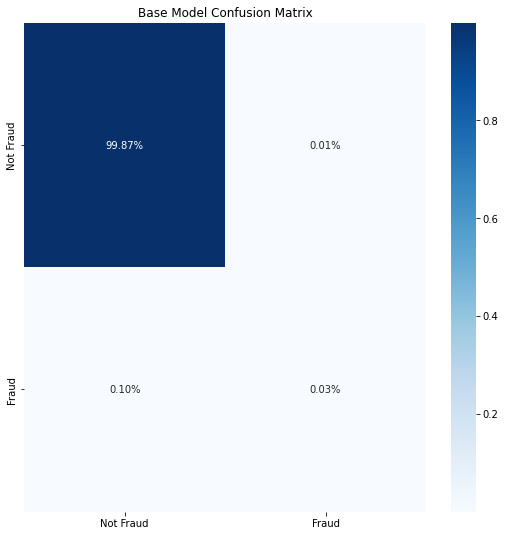

In [31]:
base_cf = confusion_matrix(y_test5, base_pred)

fig1, ax= plt.subplots(figsize = (9,9))
sns.heatmap(base_cf/np.sum(base_cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Base Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [25]:
#oversample of 5 principal components 
not_fraud5 = FivePC_a[FivePC_a.Class==0]
fraud5 = FivePC_a[FivePC_a.Class==1]

fraud_oversampled5 = resample(fraud5,
                          replace=True, 
                          n_samples=len(not_fraud5), 
                          random_state=27) 

# combine
oversampled5 = pd.concat([not_fraud5, fraud_oversampled5])

# check new class counts
oversampled5.Class.value_counts()

0    187893
1    187893
Name: Class, dtype: int64

In [26]:
#split into X and Y train
y_train5_over = oversampled5.Class
X_train5_over = oversampled5.drop('Class', axis=1)

#run model
model5 = LR.fit(X_train5_over, y_train5_over)
pred5 = model5.predict(X_test5)

print('Accuracy of Logistic Regression Model on 5 Principal Components: ', model5.score(X_test5, y_test5))

Accuracy of Logistic Regression Model on 5 Principal Components:  0.9154910612557744


In [27]:
print(classification_report(y_test5, pred5))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     96422
           1       0.01      0.90      0.03       124

    accuracy                           0.92     96546
   macro avg       0.51      0.91      0.49     96546
weighted avg       1.00      0.92      0.95     96546



With oversampling we can see that 90% of the fraudulent transactions were captured; however, only 0.1% of the transactions classified as fraudent were correctly classifed. This can pose issues in regards to ineffeciency. Once something is classifed as fraudlent there is research that has to go into validating those claims, so we want to balance the amount of false positves and false negatives.

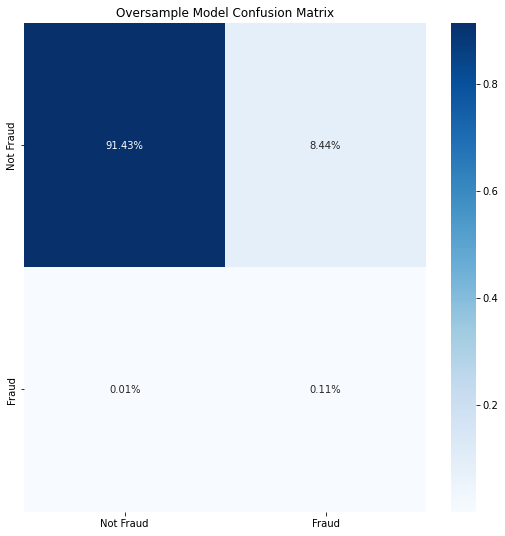

In [32]:
oversample_cf = confusion_matrix(y_test5, pred5)

fig2, ax= plt.subplots(figsize = (9,9))
sns.heatmap(oversample_cf/np.sum(oversample_cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Oversample Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [28]:
#undersample of 5 principal components 

not_fraud_undersampled5 = resample(not_fraud5,
                                replace = False, # sample without replacement
                                n_samples = len(fraud5), # match minority n
                                random_state = 27) # reproducible results

#combine
undersampled5 = pd.concat([not_fraud_undersampled5, fraud5])

# checking counts
undersampled5.Class.value_counts()

0    368
1    368
Name: Class, dtype: int64

In [29]:
#split into X and Y train
y_train5_under = undersampled5.Class
X_train5_under = undersampled5.drop('Class', axis=1)

#run model
model5_under = LR.fit(X_train5_under, y_train5_under)
pred5_under = model5_under.predict(X_test5)

print('Accuracy of Logistic Regression Model on 5 Principal Components: ', model5_under.score(X_test5, y_test5))

Accuracy of Logistic Regression Model on 5 Principal Components:  0.9103121827936942


In [30]:
print(classification_report(y_test5, pred5_under))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     96422
           1       0.01      0.90      0.02       124

    accuracy                           0.91     96546
   macro avg       0.51      0.90      0.49     96546
weighted avg       1.00      0.91      0.95     96546



Undersampling performed similarly to oversampling in terms of precision and recall, so as it was lower in accuracy as well, this may not be the best method to training the model. 

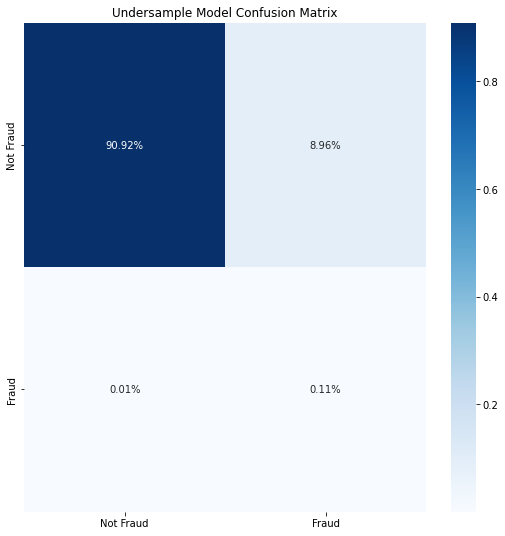

In [33]:
undersample_cf = confusion_matrix(y_test5, pred5_under)

fig3, ax= plt.subplots(figsize = (9,9))
sns.heatmap(undersample_cf/np.sum(undersample_cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Undersample Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

With the logistic regression model it appears that the base model produced the best model in fraud prediction. It allowed for a balance between the percentage of correctly predicted fraudulent transactions and incorrectly predicted non-fraudulent transactions. 

To an extent I believe that it would be more useful to have model that predicts more false postives versus false negatives when it comes to identifying fraudulent behavior. 

Now I want to explore if there is a model that will outperform the logistic regression model. In this case we are going to look at a classification tree. Similarly to the Logistic regression model we will look at the base model, oversampled model, and undersampled model for Random Forest Classification. 

In [34]:
#First I want to run the random forest classifier model to see how it performs without any modifications
#for dealing with imbalances

RF = RandomForestClassifier(random_state = 42)
base_model1 = RF.fit(X_train5, y_train5)
base_pred1 = base_model1.predict(X_test5)
print('Accuracy of Random Forest Base Model: ', base_model1.score(X_test5, y_test5))

Accuracy of Random Forest Base Model:  0.9990885173906738


In [35]:
print(classification_report(y_test5, base_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96422
           1       0.88      0.34      0.49       124

    accuracy                           1.00     96546
   macro avg       0.94      0.67      0.74     96546
weighted avg       1.00      1.00      1.00     96546



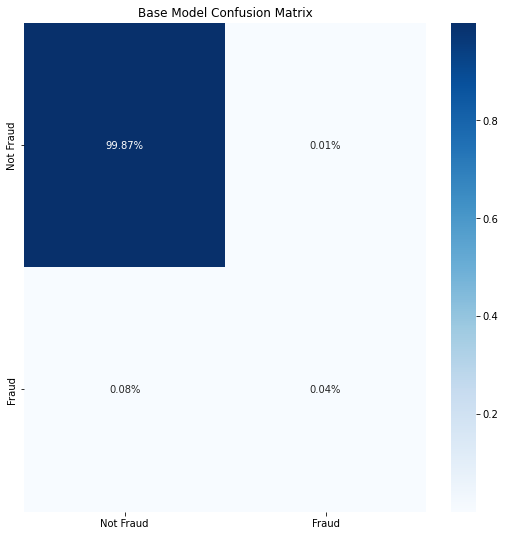

In [40]:
base_cf1 = confusion_matrix(y_test5, base_pred1)

fig1, ax= plt.subplots(figsize = (9,9))
sns.heatmap(base_cf1/np.sum(base_cf1), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Base Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [36]:
#oversampled
#run model

model5_1 = RF.fit(X_train5_over, y_train5_over)
pred5_1 = model5_1.predict(X_test5)

print('Accuracy of Random Forest Model on 5 Principal Components: ', model5_1.score(X_test5, y_test5))

Accuracy of Random Forest Model on 5 Principal Components:  0.9990885173906738


In [37]:
print(classification_report(y_test5, pred5_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96422
           1       0.86      0.35      0.49       124

    accuracy                           1.00     96546
   macro avg       0.93      0.67      0.75     96546
weighted avg       1.00      1.00      1.00     96546



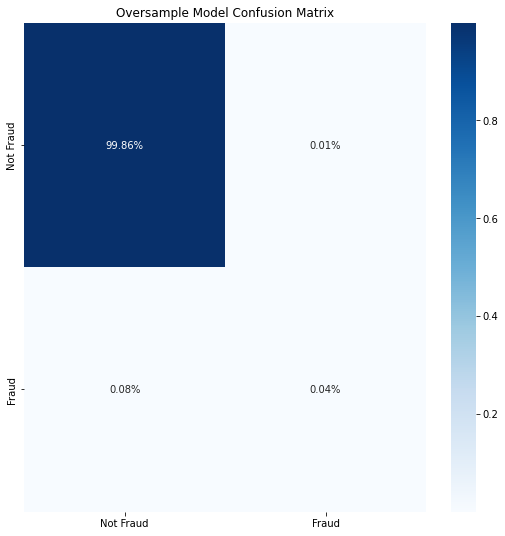

In [41]:
oversample_cf1 = confusion_matrix(y_test5, pred5_1)

fig2, ax= plt.subplots(figsize = (9,9))
sns.heatmap(oversample_cf1/np.sum(oversample_cf1), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Oversample Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [38]:
#run model
model5_under1 = LR.fit(X_train5_under, y_train5_under)
pred5_under1 = model5_under1.predict(X_test5)

print('Accuracy of Random Forest Model on 5 Principal Components: ', model5_under1.score(X_test5, y_test5))

Accuracy of Random Forest Model on 5 Principal Components:  0.9103121827936942


In [39]:
print(classification_report(y_test5, pred5_under1))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     96422
           1       0.01      0.90      0.02       124

    accuracy                           0.91     96546
   macro avg       0.51      0.90      0.49     96546
weighted avg       1.00      0.91      0.95     96546



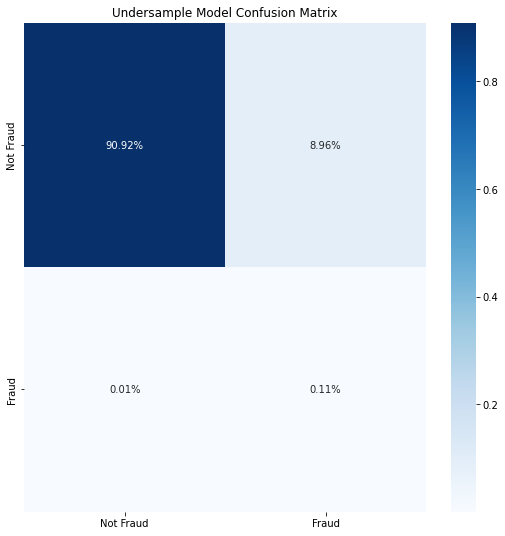

In [42]:
undersample_cf1 = confusion_matrix(y_test5, pred5_under1)

fig3, ax= plt.subplots(figsize = (9,9))
sns.heatmap(undersample_cf1/np.sum(undersample_cf1), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Undersample Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

Out of the three sets of data run on the Random Forest Classification model the undersampling peformed the worst which was similar to the logistic regression and the oversampled model performed slightly better, but similar to the base model. 

Out of the 6 models created the best performing model was the Random Forest model trained on an oversampled dataset. It had the highest percentage of correctly classifed fraudulent transactions and the lowest number of incorrectly classifed fraudulent transactions. We are going to do a grid search cross validation on this model to tune the hyperparameters. 

In [43]:
model5_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [44]:
[(est.get_depth(), est.tree_.max_depth, est.max_depth) for est in model5_1.estimators_]

[(24, 24, None),
 (25, 25, None),
 (30, 30, None),
 (27, 27, None),
 (23, 23, None),
 (24, 24, None),
 (26, 26, None),
 (27, 27, None),
 (28, 28, None),
 (20, 20, None),
 (27, 27, None),
 (22, 22, None),
 (31, 31, None),
 (27, 27, None),
 (25, 25, None),
 (25, 25, None),
 (26, 26, None),
 (28, 28, None),
 (24, 24, None),
 (26, 26, None),
 (24, 24, None),
 (23, 23, None),
 (25, 25, None),
 (23, 23, None),
 (24, 24, None),
 (26, 26, None),
 (28, 28, None),
 (27, 27, None),
 (28, 28, None),
 (22, 22, None),
 (30, 30, None),
 (26, 26, None),
 (29, 29, None),
 (21, 21, None),
 (23, 23, None),
 (23, 23, None),
 (23, 23, None),
 (25, 25, None),
 (25, 25, None),
 (26, 26, None),
 (29, 29, None),
 (31, 31, None),
 (25, 25, None),
 (26, 26, None),
 (27, 27, None),
 (27, 27, None),
 (23, 23, None),
 (23, 23, None),
 (21, 21, None),
 (27, 27, None),
 (25, 25, None),
 (21, 21, None),
 (27, 27, None),
 (26, 26, None),
 (23, 23, None),
 (24, 24, None),
 (24, 24, None),
 (23, 23, None),
 (24, 24, None

In [45]:
grid = [{'bootstrap': [True, False], 'max_features': ['log2', 'sqrt'], 'n_jobs': [-1],
         'max_depth': [10,20,50]}]
grid_search = GridSearchCV(model5_1, grid, cv =5)
grid_search.fit(X_train5_over, y_train5_over)
grid_search.best_params_

{'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'n_jobs': -1}

In [46]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='log2',
                       n_jobs=-1, random_state=42)

In [47]:
print('Accuracy of best model: ', grid_search.score(X_test5, y_test5))

Accuracy of best model:  0.9990056553352806


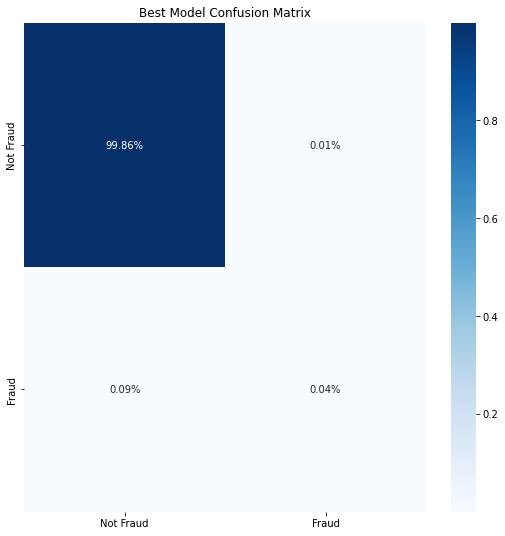

In [48]:
final_pred = grid_search.predict(X_test5)

best_cf = confusion_matrix(y_test5, final_pred)

fig4, ax= plt.subplots(figsize = (9,9))
sns.heatmap(best_cf/np.sum(best_cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Best Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [49]:
sorted(zip(model5_1.feature_importances_, X_train5_over))

[(0.04900429388764037, 'transformed_amount'),
 (0.08824292712832339, 'V1'),
 (0.10259196995593084, 'V5'),
 (0.15832648753507117, 'V2'),
 (0.24932009166538777, 'V3'),
 (0.3525142298276465, 'V4')]

The 4th and 3rd principal components were the most important features of this model

# Looking Into Biasing the Model

For credit card fraud detection it is more costly for the instituition if a transaction is misclassified as non-fraudlent when it is in fact fraudulent. In this case we would want our model to add more weight into predicting False Positives. 

In [50]:
cost_RF = RandomForestClassifier(class_weight = {0:.25, 1:2.75}, max_depth = 15, random_state = 42)
cost_model = cost_RF.fit(X_train5_over, y_train5_over)
cost_pred = cost_model.predict(X_test5)

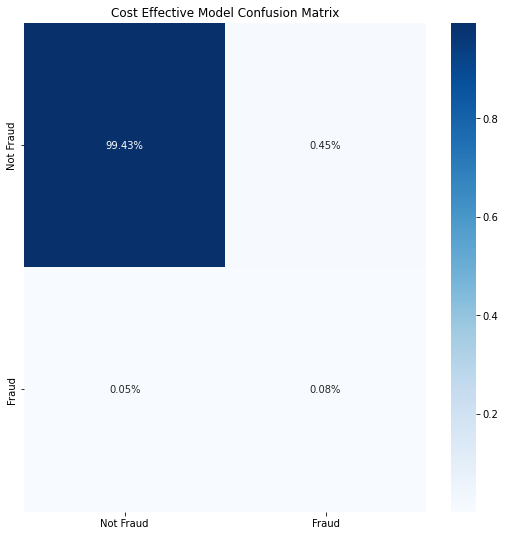

In [51]:
cost_cf = confusion_matrix(y_test5, cost_pred)
fig4, ax= plt.subplots(figsize = (9,9))
sns.heatmap(cost_cf/np.sum(cost_cf), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Cost Effective Model Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Fraud', 'Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud', 'Fraud'])

plt.show()

In [52]:
print(classification_report(y_test5, cost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96422
           1       0.16      0.65      0.25       124

    accuracy                           1.00     96546
   macro avg       0.58      0.82      0.62     96546
weighted avg       1.00      1.00      1.00     96546



In [53]:
cost_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.25, 1: 2.75},
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

By changing the class weights of the Random Forest Classifier as well as decrease the depth, we were able to dramatically increase the amount of false positives and reduce the amount of false negatives. This way we are able to reduce the cost associated with not catching a fradulent transaction. However, by biasing the model we sacrifice precision for recall. In this case precision for prediction fraudulent transactions dropped from 0.84 with our best model to 0.13 while recall increased from 0.37 to 0.59. As well our f1-score decreased. 

# Root Cause Analysis

In this section we will investigate to see if we can find any commonalities between the records that are misclassified.

In [54]:
unbiased = FivePC_b.copy()
unbiased['Prediction'] = pred5_1
unbiased['Amount'] = transactions_b['Amount']
unbiased.head()

,V1,V2,V3,V4,V5,transformed_amount,Class,Prediction,Amount
0,0.155432,-0.513165,0.348025,-2.290819,0.412328,0.244887,0,0,30.43
1,0.144968,0.984625,-0.469259,-0.559418,0.898427,-0.348685,0,0,9.98
2,-0.611349,1.283775,-1.974043,-1.655406,2.984231,1.170169,0,0,1.98
3,1.836002,-1.291509,-1.777315,-0.937930,-0.474535,0.139366,0,0,210.00
4,2.013508,0.171357,-2.245188,0.936324,0.243521,-0.076805,0,0,12.31


In [55]:
#False positive mis-classifcation
FP_unbiased = unbiased[(unbiased['Class'] == 0) & (unbiased['Prediction'] == 1)]
FP_unbiased

,V1,V2,V3,V4,V5,transformed_amount,Class,Prediction,Amount
1561,-5.227966,0.369520,-5.010226,5.063297,0.312231,-0.341413,0,1,112.27
6600,-3.053283,-0.178224,-3.533756,4.907345,-1.758248,-0.307236,0,1,628.56
31871,0.982346,3.453083,-4.905300,5.719395,2.656346,-0.352321,0,1,0.77
40244,-1.068669,4.016917,-3.366334,3.586212,3.395280,-0.358663,0,1,0.77
46437,-1.047816,2.482353,-4.025920,4.522588,-3.108121,-0.303035,0,1,831.17
71264,-1.690612,2.119855,-0.963569,3.603465,-1.025391,-0.339596,0,1,223.78
79153,-1.068723,0.004500,-3.875803,4.913447,-5.719842,0.255794,0,1,1575.21


In [56]:
FP_unbiased.describe()

,V1,V2,V3,V4,V5,transformed_amount,Class,Prediction,Amount
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000
mean,-1.739246,1.752572,-3.668701,4.616535,-0.749678,-0.249496,0.0,1.0,481.790000
std,1.944421,1.702108,1.349490,0.783723,3.195501,0.223821,0.0,0.0,578.078683
min,-5.227966,-0.178224,-5.010226,3.586212,-5.719842,-0.358663,0.0,1.0,0.770000
25%,-2.371947,0.187010,-4.465610,4.063026,-2.433185,-0.346867,0.0,1.0,56.520000
50%,-1.068723,2.119855,-3.875803,4.907345,-1.025391,-0.339596,0.0,1.0,223.780000
75%,-1.058243,2.967718,-3.450045,4.988372,1.484288,-0.305136,0.0,1.0,729.865000
max,0.982346,4.016917,-0.963569,5.719395,3.395280,0.255794,0.0,1.0,1575.210000


In [57]:
#False negative mis-classification
FN_unbiased = unbiased[(unbiased['Class'] == 1) & (unbiased['Prediction'] == 0)]
FN_unbiased

,V1,V2,V3,V4,V5,transformed_amount,Class,Prediction,Amount
1617,-5.313774,2.664274,-4.250707,0.394707,-0.391383,-0.355512,1,0,1.00
2813,-1.836940,-1.646764,-3.381168,0.473354,0.074243,1.626911,1,0,720.80
3006,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.267081,1,0,7.18
3098,1.177824,2.487103,-5.330608,5.324547,1.150243,-0.175942,1,0,4.87
4121,0.753356,2.284988,-5.164492,3.831112,-0.073622,-0.200221,1,0,2.00
...,...,...,...,...,...,...,...,...,...
91602,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-0.355512,1,0,390.00
91882,1.378559,1.289381,-5.004247,1.411850,0.442581,-0.319194,1,0,0.76
91888,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.352321,1,0,77.89
92883,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-0.298955,1,0,245.00


In [58]:
FN_unbiased.describe()

,V1,V2,V3,V4,V5,transformed_amount,Class,Prediction,Amount
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0,81.0,81.000000
mean,-1.452434,0.669208,-3.689529,2.877586,0.718430,-0.064869,1.0,0.0,167.029136
std,2.644650,2.495434,1.957323,2.009294,2.138663,0.451089,0.0,0.0,316.793470
min,-7.503926,-8.402154,-6.978585,-0.755458,-4.011781,-0.359552,1.0,0.0,0.000000
25%,-3.158990,-0.360628,-5.388316,1.411850,-0.391383,-0.329294,1.0,0.0,1.000000
50%,-1.053840,1.289381,-3.829762,2.588033,0.474761,-0.234681,1.0,0.0,8.300000
75%,0.753356,2.284988,-2.333469,4.617410,1.407133,0.003992,1.0,0.0,195.660000
max,2.132386,4.672553,0.733222,7.143500,9.880564,1.907195,1.0,0.0,1504.930000


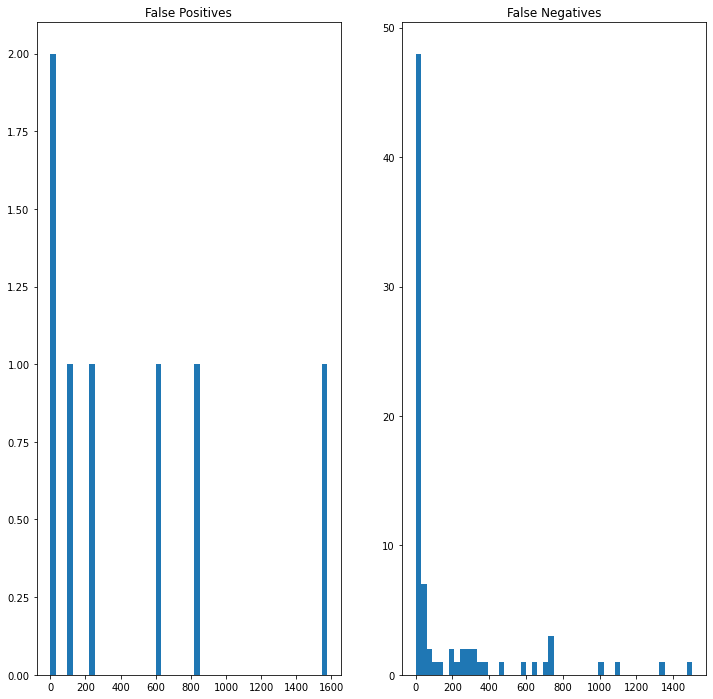

In [59]:
fig6, axes = plt.subplots(1,2,figsize = (12,12))
axes[0].hist('Amount', data = FP_unbiased, bins = 50)
axes[0].set_title('False Positives')
axes[1].hist('Amount', data = FN_unbiased, bins = 50)
axes[1].set_title('False Negatives')
plt.show()

It appears based on the descriptive statistics and the histograms that the items that were classifed as non-fraudulent, but were fraudulent (False Negatives) were due to the transactions having a lower spend amount. The case is similarly true for the transactions classified as fraudulent, but were non-fraudulent (False Positives). These transactions had a higher average spend amount. 